In [12]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
Steps = pd.read_csv("Steps.csv")
Calendar = pd.read_csv("Calendar.csv")
Calendar.columns = Calendar.columns.str.strip()
Steps.head()

,Unnamed: 0,Date,Steps
0,0,2018-06-02,3140
1,1,2018-06-03,9810
2,2,2018-06-04,6551
3,3,2018-06-05,6107
4,4,2018-06-06,2569


In [15]:
#Calendar columns we want 
Calendar = Calendar[['Date','AD_Month','AH_Month',"Long_Vacation","Short_Vacation","National_Day","Ramadan","Sch_Eid_Adha","Sch_Eid_Fatr","National_Day","National_Day_Ext","AD_WeekdayNum"]]
Steps = Steps[["Date","Steps"]]

Merged = pd.merge(Steps,Calendar,how="left",on="Date")
Merged.sort_values('Date',inplace=True)
Merged = Merged.iloc[:,1:]

ValueError: could not broadcast input array from shape (1207) into shape (4)

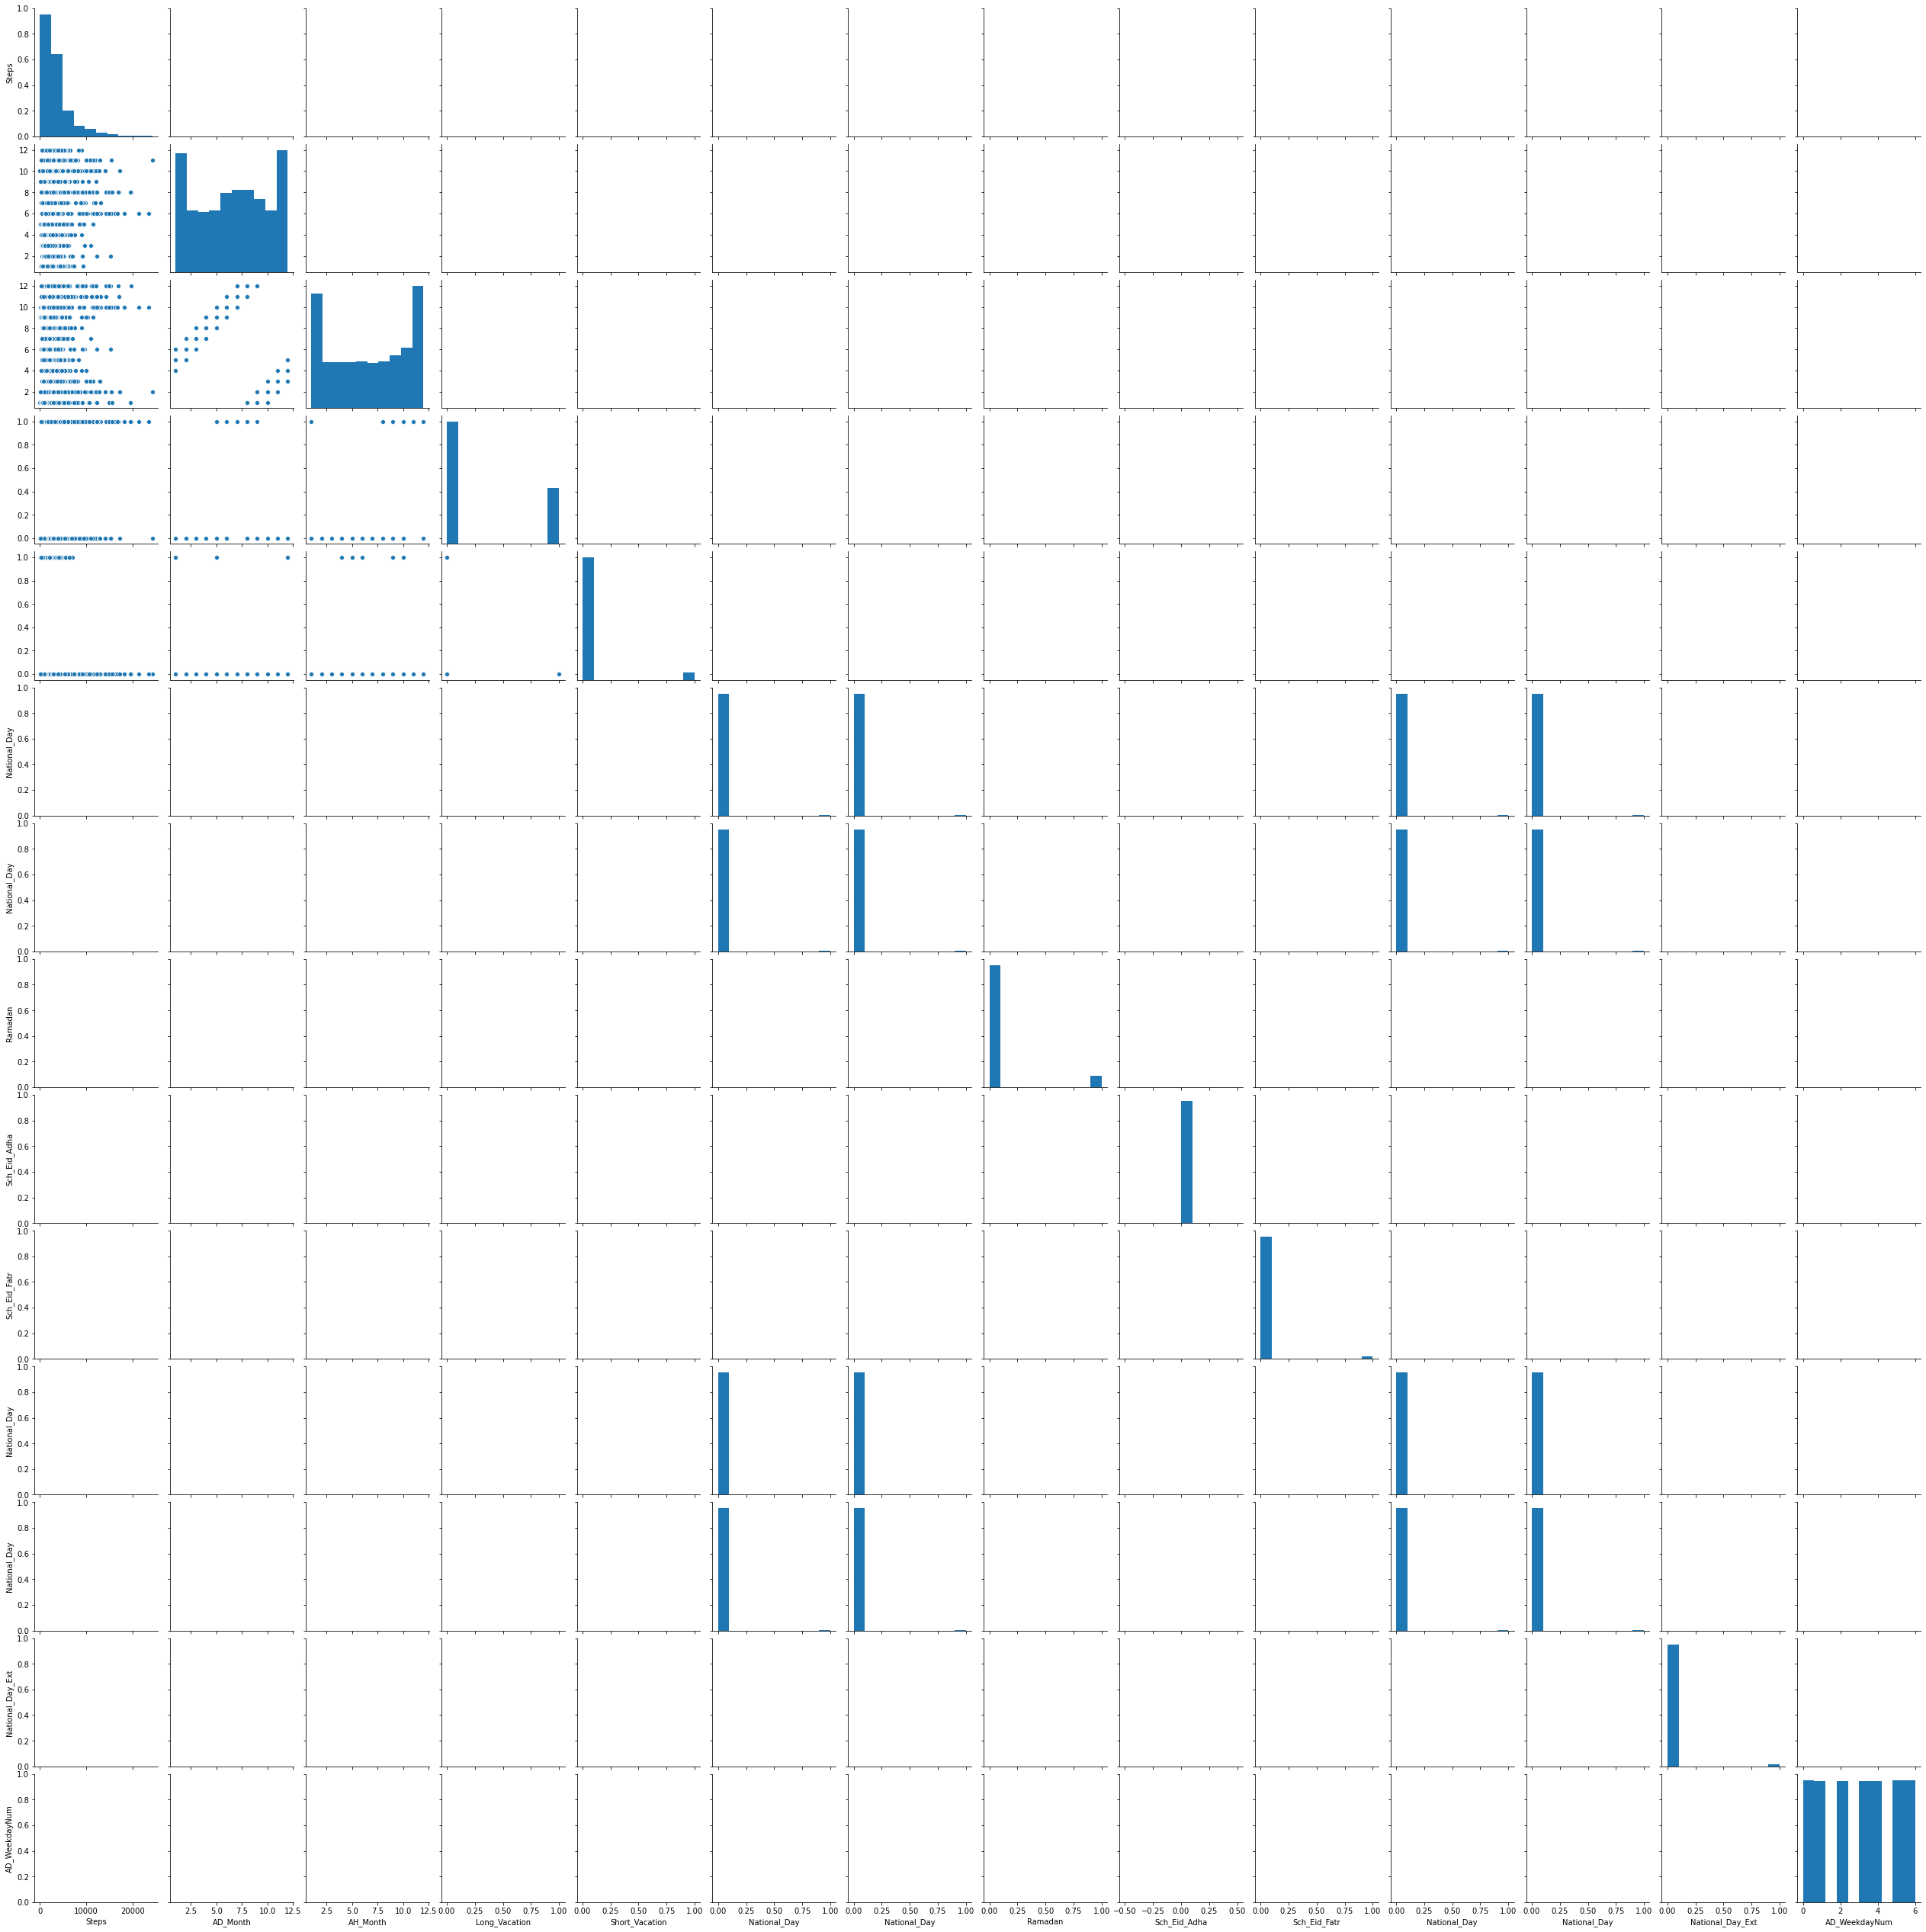

In [16]:
sns.pairplot(Merged)

In [32]:

y = Merged.iloc[:,:1]
x = Merged.iloc[:,1:]
x

,AD_Month,AH_Month,Long_Vacation,Short_Vacation,National_Day,National_Day,Ramadan,Sch_Eid_Adha,Sch_Eid_Fatr,National_Day,National_Day,National_Day_Ext,AD_WeekdayNum
0,6,9,1,0,0,0,1,0,0,0,0,0,5
1,6,9,1,0,0,0,1,0,0,0,0,0,6
2,6,9,1,0,0,0,1,0,0,0,0,0,0
3,6,9,1,0,0,0,1,0,0,0,0,0,1
4,6,9,1,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,9,2,0,0,0,0,0,0,0,0,0,0,3
1203,9,2,0,0,0,0,0,0,0,0,0,0,4
1204,9,2,0,0,0,0,0,0,0,0,0,0,5
1205,9,2,0,0,0,0,0,0,0,0,0,1,6


In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

#del x['Sch_Eid_Adha']
#del x['Sch_Eid_Fatr']
#del x['National_Day']
#del x['National_Day_Ext']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)
#y, X = patsy.dmatrices('Steps ~  AD_WeekdayNum', data=Merged, return_type="dataframe")
mean_absolute_error(lm.predict(X_test),y_test)
# Create your model
#model = sm.OLS(y, X)
lm.predict(X_test)
# Fit your model to your training set
#fit = model.fit()

# Print summary statistics of the model's performance
#fit.summary()

array([[4127.83401306],
       [2877.5666161 ],
       [2671.49425545],
       [4164.46942376],
       [2774.15924234],
       [2903.56204935],
       [2707.38727927],
       [4124.37349974],
       [4237.74024514],
       [4183.9659987 ],
       [4057.60153667],
       [4220.60140939],
       [4439.67148667],
       [3977.83185697],
       [2744.02268996],
       [4167.50776874],
       [4008.71079622],
       [4220.60140939],
       [2774.15924234],
       [2608.8634115 ],
       [4213.36016421],
       [4214.84493794],
       [4201.10483445],
       [2645.49882219],
       [2866.92663866],
       [1679.58212033],
       [4250.73796177],
       [4141.57411656],
       [2701.46246261],
       [2664.25301026],
       [2817.29351134],
       [1875.01450354],
       [1765.10827147],
       [3975.53589885],
       [2817.29351134],
       [4195.348363  ],
       [4117.87464142],
       [3941.19644628],
       [4167.50776874],
       [2724.52611502],
       [2731.02497333],
       [4091.198

In [42]:
X_test

,AD_Month,AH_Month,Long_Vacation,Short_Vacation,Ramadan,AD_WeekdayNum
101,9,1,0,0,0,1
260,2,6,0,0,0,6
1083,5,10,0,0,0,3
109,9,1,0,0,0,2
649,3,7,0,0,0,3
...,...,...,...,...,...,...
789,7,12,1,0,0,3
754,6,11,1,0,0,3
471,9,1,0,0,0,0
1085,5,10,0,0,0,5


In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

<ipython-input-45-a88fa511d733>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest Regression: 0.06535228562740536
Gradient Boosted Regression: 0.05704139995752977


C:\Users\ialzu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
